# Geochemistry - Automated ML Clustering 

## using pycaret framework


Hierarchical clustering of XRF geochemistry with constraint.

+ Features
    + Custom geochemistry dataframe I/O
    + Automated ML framework built on PyCaret
    + Depth constraints for hierarchical clusters 
    + Visualization / interpretation utilities 

N.C. Howes   
November 2021

## Configuration

Load custom geochemistry module from digital-core package. 

In [43]:
import sys, os 
sys.path.append("..")

#For development 
%reload_ext autoreload
%autoreload 2

In [44]:
from digitalcore import GeochemML

Read sample geochemistry data from csv. OOLDEA2 core from South Australia. 

In [45]:
#Input path 
filepath = '../data/OOLDEA2_1m_intervals.csv'

# Output path
fullpath_to_product = '../data/data-products/OOLDEA2_1m_intervals-labeled.csv'

## Workflow

In [46]:
this = GeochemML.read_csv( filepath )

Custom geochemistry dataframe provides convenience methods for: preview, visualization, and feature mapping. We'll preview the header, plot an element series, and list the subset of variables that are used as features in the clustering analysis. To see a list of masked or "ignored" variables, call `this.get_ignorefeatures()`. These are used for visualization and interpretation, but not the model fits. By default all metadata, depth, mdl, and 2SE variables are omitted.  

View the first 5 rows/instances, use `this.tail()` to view the last n rows. 

In [49]:
this.head()

,id,result_master_id,DDH_name,from_m,to_m,Sample_Length_m,Scan_Length_m,Scan_Recovery_pct,Comp(c/s),Rayl(c/s),LT(secs),Al_pct,Al_2SE_pct,Al_mdl_pct,Si_pct,Si_2SE_pct,Si_mdl_pct,P_ppm,P_2SE_ppm,P_mdl_ppm,S_pct,S_2SE_pct,S_mdl_pct,Cl_ppm,Cl_2SE_ppm,Cl_mdl_ppm,K_pct,K_2SE_pct,K_mdl_pct,Ca_pct,Ca_2SE_pct,Ca_mdl_pct,Ti_ppm,Ti_2SE_ppm,Ti_mdl_ppm,V_ppm,V_2SE_ppm,V_mdl_ppm,Cr_ppm,Cr_2SE_ppm,Cr_mdl_ppm,Mn_ppm,Mn_2SE_ppm,Mn_mdl_ppm,Fe_pct,Fe_2SE_pct,Fe_mdl_pct,Ni_ppm,Ni_2SE_ppm,Ni_mdl_ppm,Cu_pct,Cu_2SE_pct,Cu_mdl_pct,Zn_pct,Zn_2SE_pct,Zn_mdl_pct,Ga_ppm,Ga_2SE_ppm,Ga_mdl_ppm,As_ppm,As_2SE_ppm,As_mdl_ppm,Se_ppm,Se_2SE_ppm,Se_mdl_ppm,Rb_ppm,Rb_2SE_ppm,Rb_mdl_ppm,Sr_ppm,Sr_2SE_ppm,Sr_mdl_ppm,Y_ppm,Y_2SE_ppm,Y_mdl_ppm,Zr_ppm,Zr_2SE_ppm,Zr_mdl_ppm,Nb_ppm,Nb_2SE_ppm,Nb_mdl_ppm,Mo_ppm,Mo_2SE_ppm,Mo_mdl_ppm,Ba_ppm,Ba_2SE_ppm,Ba_mdl_ppm,La_ppm,La_2SE_ppm,La_mdl_ppm,Ce_ppm,Ce_2SE_ppm,Ce_mdl_ppm,Pb_pct,Pb_2SE_pct,Pb_mdl_pct,U_ppm,U_2SE_ppm,U_mdl_ppm,minaloggerlink
0,69232,38,OOLDEA2,13,14,1,0.2401,24.01,2613.187,715.3073,22.69,2.4882,0.6711,0.8397,22.3157,0.7263,0.2942,0.0,0.0,0.0,0.3293,0.0857,0.0857,0,0,0,2.1815,0.0337,0.0067,1.1516,0.0167,0.0036,4394.9931,77.9360,17.3857,101.98,13.27,10.31,41.43,9.57,13.31,997.5006,24.7826,10.8424,4.6119,0.0128,0.0013,33.92,2.65,2.87,0.0047,0.0006,0.0009,0.0069,0.0004,0.0004,16.84,2.33,3.26,0.0,3.86,5.72,0.0,0.0003,0.0005,110.82,6.34,7.45,183.08,8.34,6.53,17.90,8.74,12.56,246.13,11.49,12.17,0.0,8.85,13.49,0,9.9,14.93,564.78,260.39,75.76,144.19,88.37,35.04,87.31,54.90,40.99,0.0029,0.0017,0.0025,22.97,15.03,20.40,https://minalogger.com/viewer/?project=WESTERN...
1,69233,38,OOLDEA2,14,15,1,0.4056,40.56,2498.827,653.7424,37.04,5.4625,0.6962,0.5558,23.3913,0.6344,0.2257,0.0,0.0,0.0,1.5906,0.2473,0.0677,0,0,0,2.0354,0.0278,0.0057,4.2996,0.0382,0.0031,3972.9395,65.3464,15.5872,97.18,11.19,9.17,61.02,8.89,11.63,1374.6612,29.4294,9.2935,5.9728,0.0127,0.0010,35.88,2.31,2.42,0.0047,0.0005,0.0007,0.0060,0.0003,0.0003,20.55,1.95,2.69,0.0,3.22,4.80,0.0,0.0003,0.0004,101.26,5.26,6.11,186.29,7.73,5.36,25.48,7.69,10.26,241.73,9.88,9.91,0.0,7.27,11.02,0,0.0,0.00,748.25,221.11,69.75,98.25,69.88,31.75,70.23,45.22,36.78,0.0030,0.0014,0.0021,20.18,12.16,16.75,https://minalogger.com/viewer/?project=WESTERN...
2,69234,38,OOLDEA2,15,16,1,0.6329,63.29,2869.263,702.2439,47.39,2.9798,0.5095,0.5622,23.6034,0.5939,0.2036,0.0,0.0,0.0,1.0650,0.1690,0.0604,0,0,0,2.4316,0.0300,0.0048,2.5947,0.0242,0.0026,3402.2079,54.5552,13.1892,87.11,9.43,7.79,43.69,7.46,10.09,948.7098,20.9103,8.5190,5.0235,0.0103,0.0009,37.76,2.14,2.13,0.0066,0.0005,0.0007,0.0052,0.0003,0.0003,22.75,1.76,2.39,0.0,2.73,4.18,0.0,0.0002,0.0004,124.88,5.15,5.35,202.79,7.90,4.71,9.16,6.21,9.04,265.10,9.75,8.75,0.0,6.34,9.53,0,7.1,10.50,496.97,171.95,56.96,88.25,56.43,26.37,113.00,36.45,30.90,0.0032,0.0012,0.0019,31.67,10.89,14.70,https://minalogger.com/viewer/?project=WESTERN...
3,69235,38,OOLDEA2,16,17,1,0.6143,61.43,2594.439,641.5786,48.72,4.0648,0.5209,0.4220,19.1905,0.5057,0.1687,0.0,0.0,0.0,0.0773,0.0377,0.0505,0,0,0,1.8808,0.0243,0.0040,1.1856,0.0132,0.0022,2410.0222,40.7665,10.1916,57.86,7.19,6.26,23.88,5.73,8.09,431.3725,11.6169,6.9701,3.2593,0.0076,0.0008,25.37,1.62,1.66,0.0040,0.0004,0.0005,0.0035,0.0002,0.0002,16.84,1.38,1.91,0.0,0.00,0.00,0.0,0.0002,0.0003,104.59,4.30,4.45,158.59,6.25,3.92,0.00,0.00,0.00,200.86,7.75,7.33,0.0,0.00,0.00,0,6.0,8.82,367.05,136.17,45.81,57.82,45.34,21.19,73.96,29.13,24.85,0.0036,0.0010,0.0015,24.23,9.12,12.22,https://minalogger.com/viewer/?project=WESTERN...
4,69236,38,OOLDEA2,17,18,1,0.4486,44.86,2578.841,647.0553,43.21,3.4820,0.5105,0.4811,15.7049,0.4627,0.1896,0.0,0.0,0.0,0.2257,0.0546,0.0538,0,0,0,2.0808,0.0269,0.0042,0.9481,0.0117,0.0024,1746.3668,33.5724,10.7911,30.69,6.87,6.71,16.87,6.03,8.61,1443.5878,29.4294,6.9701,3.2247,0.0079,0.0008,20.59,1.54,1.78,0.0041,0.0004,0.0005,0.0038,0.0002,0.0003,12.19,1.45,2.04,0.0,0.00,0.00,0.0,0.0002,0.0003,151.94,5.48,4.86,129.75,5.65,4.31,18.43,6.21,8.30,171.48,7.61,8.09,0.0,0.00,0.00,0,6.6,9.94,6

Plot an element series

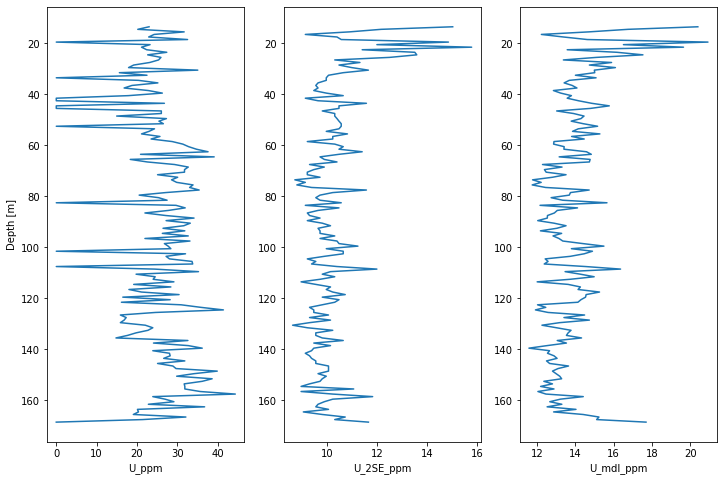

In [50]:
this.plot_element( "U" )

List features used for fit... 

In [51]:
features = this.get_features()
print( features )
print( len(features) )

['Zn_pct', 'Ce_ppm', 'Cu_pct', 'Ba_ppm', 'S_pct', 'K_pct', 'Ti_ppm', 'P_ppm', 'Mn_ppm', 'Fe_pct', 'Al_pct', 'Ni_ppm', 'Nb_ppm', 'Ca_pct', 'Y_ppm', 'As_ppm', 'Rb_ppm', 'Pb_pct', 'La_ppm', 'Ga_ppm', 'Se_ppm', 'Sr_ppm', 'Mo_ppm', 'Cr_ppm', 'V_ppm', 'U_ppm', 'Zr_ppm', 'Si_pct', 'Cl_ppm']
29


## Prepare experiment 

Specify the **data preparation** parameters to be used for the experiment.   

Parameters to explore include:
+ Feature scaling/normalization: zscore, minmax 
+ Dimension reduction: principal component analysis, etc... 


It also possible to pass a custom preparation pipeline as an input option. See the PyCaret documentation on cluster setup for more options: [PyCaret Cluster Setup](https://pycaret.readthedocs.io/en/latest/api/clustering.html)

In [52]:
this.dataopts = dict(
    normalize=True,
    )

this.prepare( silent=True )

,Description,Value
0,session_id,123
1,Original Data,"(156, 99)"
2,Missing Values,False
3,Numeric Features,29
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(156, 29)"
9,CPU Jobs,-1


## Prepare models


Review a list available cluster models.  

In [53]:
this.get_listmodels()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


Specify the **model types** to be used for the experiment. Customize model parameters by assigning a dictionary to the `modelopts` attribute, otherwise the models will run with default parameter settings. The modelopts are global parameters and are applied to all cluster models in the experiment.

All agglomerative cluster models are depth/strat constrained. 

Parameters to explore include:
+ k-means
    + n-clusters
+ agglomerative clustering
    + linkage method
    + dissimilarity metric 
    + linkage threshold

In [54]:
# Add models. Specify as a list 
this.name = ["hclust"]

# Add optional model configuration. 
this.modelopts = dict( num_clusters = 3 )

In [55]:
this.modelopts

{'num_clusters': 3}


Fit a cluster model or array of models (autoML)

In [56]:
this.create()

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1775,17.8073,2.1288,0,0,0


### Assign labels

After fitting the models, we append vluster labels to the end of the dataframe

In [57]:
this.label()

In [58]:
this.data.iloc[10:18, [0,1,2,-2,-1] ]

,id,result_master_id,DDH_name,minaloggerlink,hclust_Cluster
10,69242,38,OOLDEA2,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0
11,69243,38,OOLDEA2,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0
12,69244,38,OOLDEA2,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0
13,69245,38,OOLDEA2,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0
14,69246,38,OOLDEA2,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0
15,69247,38,OOLDEA2,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0
16,69248,38,OOLDEA2,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0
17,69249,38,OOLDEA2,https://minalogger.com/viewer/?project=WESTERN...,Cluster 0


## Evaluate results

In [59]:
this.active = 0
this.get_activemodel()


'hclust_Cluster'

### Cluster PCA Plot (2d)  

In [60]:
this.plottype = "cluster"
this.plotmodel()

### Cluster TSnE (3d)

In [61]:
if this.get_activemodel() != "hclust_Cluster":
    this.plottype = "tsne"
    #this.plotmodel()

### Elbow Plot

In [62]:
if this.get_activemodel() != "hclust_Cluster":
    this.plottype = "elbow"
    this.plotmodel()

### Distance Plot

In [63]:
this.plottype = "distance"
#this.plotmodel()

### Distribution Plot

In [64]:
this.plottype = "distribution"
this.plotmodel()

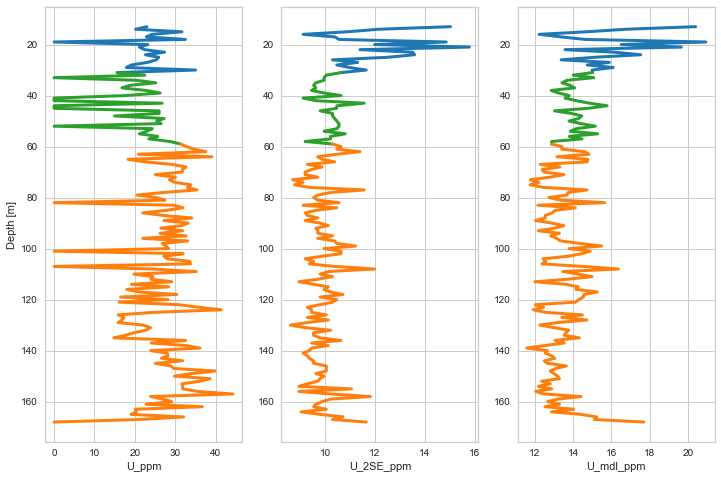

In [65]:
this.plot_element( "U", labels=True )

## Interpretation 

Aggregate element statistics by cluster.

In [66]:
df = this.aggregate( output="unstack" )
df

hclust_Cluster,element,cluster 0,cluster 1,cluster 2,type
0,Al_pct median,4.33055,4.7494,5.90025,pct
1,Ca_pct median,2.23275,0.7056,1.0129,pct
2,Cu_pct median,0.004,0.0049,0.0048,pct
3,Fe_pct median,8.24355,12.35935,14.6473,pct
4,K_pct median,2.0581,1.71665,1.9208,pct
5,Pb_pct median,0.001,0.0,0.0,pct
6,S_pct median,0.1504,0.0,0.0,pct
7,Si_pct median,19.42075,21.3501,25.1516,pct
8,Zn_pct median,0.0051,0.005,0.0074,pct
9,As_ppm median,0.0,8.285,11.825,ppm


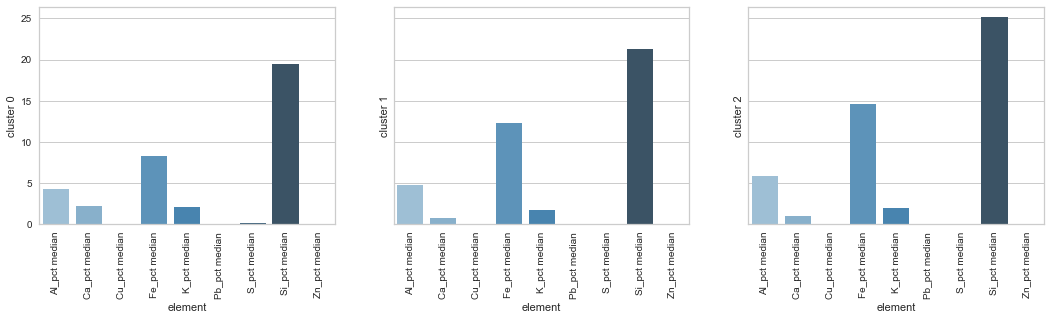

In [67]:
this.plot_aggregates( by="cluster", type="pct" )

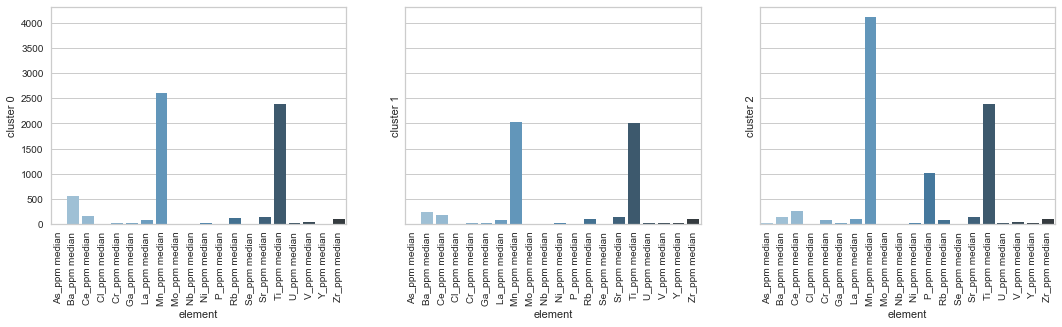

In [68]:
this.plot_aggregates( by="cluster", type="ppm" )

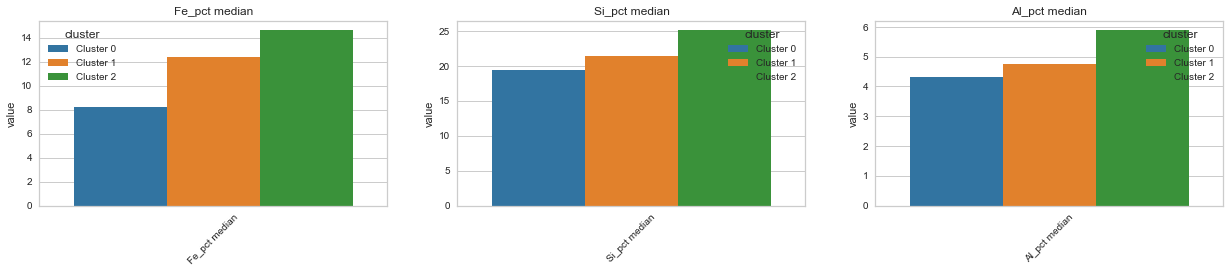

In [69]:
this.plot_aggregates( by="feature", type="pct" )

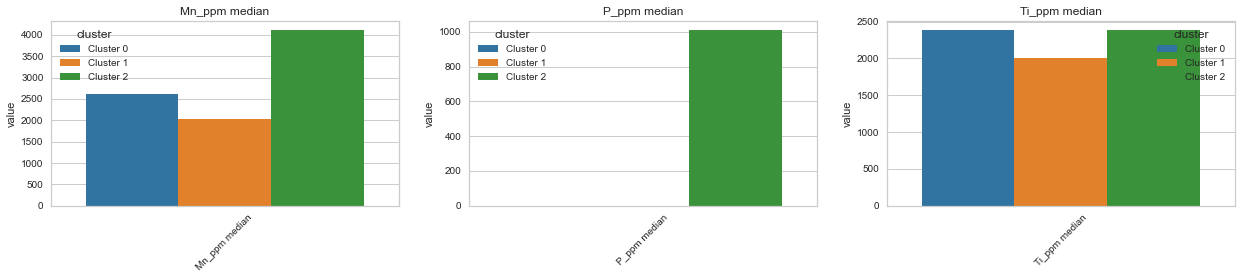

In [70]:
this.plot_aggregates( by="feature", type="ppm" )

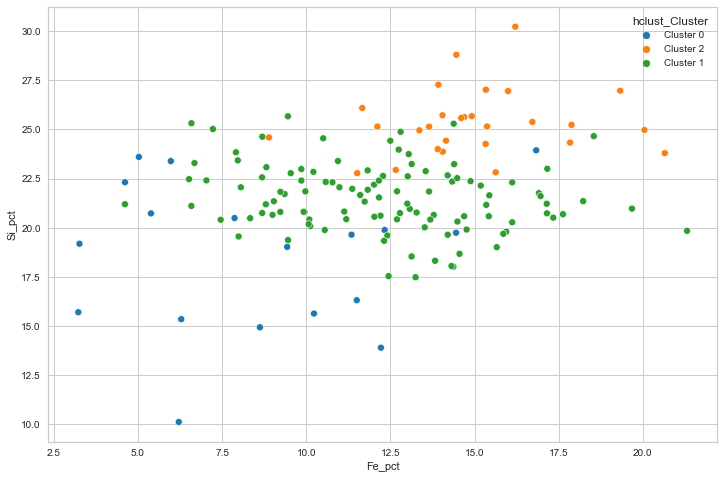

In [71]:
this.plot_scatter("Fe", "Si")

## Export

Save/write to disk. 

In [72]:
this.data.to_csv(fullpath_to_product, index=False)